In [165]:
# Load up some libraries
library(dplyr, warn.conflicts = FALSE)
library(ggplot2)
library(maps)
library(mapdata)

In [166]:
population_data_path_1 <- "county_population_1900_to_1990.csv" # County population data from 1900 to 1990
pop_data_1_df <- read.csv(file = population_data_path_1)
pop_data_1_df <- pop_data_1_df %>% filter(!grepl("\\d*000", fips)) # Get rid of state-wide data
pop_data_1_df <- pop_data_1_df[-1, ] # Get rid of nation-wide data
pop_data_1_df <- pop_data_1_df %>% select(-name)

In [167]:
head(pop_data_1_df)

,pop1900,pop1910,pop1920,pop1930,pop1940,pop1950,pop1960,pop1970,pop1980,pop1990,fips
2,17915,20038,18908,19694,20977,18186,18739,24460,32259,34222,1001
3,13194,18178,20730,28289,32324,40997,49088,59382,78556,98280,1003
4,35152,32728,32067,32425,32722,28892,24700,22543,24756,25417,1005
5,18498,22791,23144,20780,20155,17987,14357,13812,15723,16576,1007
6,23119,21456,25538,28020,29490,28975,25449,26853,36459,39248,1009
7,31944,30196,25333,20016,19810,16054,13462,11824,10596,11042,1011


In [168]:
population_data_path_2 <- "county_population_1970_to_2010.csv" # County population data from 1970 to 2010
pop_data_2_df <- read.csv(file = population_data_path_2)
pop_data_2_df <- pop_data_2_df %>% 
    filter(!grepl("\\d*000", fips)) %>% 
    filter(fips != county_fips)
pop_data_2_df <- pop_data_2_df[-1, ] # Get rid of nation-wide data
pop_data_2_df <- pop_data_2_df %>% 
    select(grep("^fips$|^pop\\d{4}$", names(pop_data_2_df))) %>%
    select(-pop2010, -pop2011, -pop2012, -pop2013, -pop2014)

In [169]:
head(pop_data_2_df, 10)

,fips,pop1970,pop1971,pop1972,pop1973,pop1974,pop1975,pop1976,pop1977,pop1978,...,pop2000,pop2001,pop2002,pop2003,pop2004,pop2005,pop2006,pop2007,pop2008,pop2009
2,1003,59382,60100,62400,64200,66100,67900,70200,72400,74500,...,141358,144988,148141,151707,156573,162564,168516,172815,176212,179878
3,1005,22543,23100,22900,23500,23400,24900,25600,24700,24500,...,29035,29223,29289,29480,29458,29452,29556,29736,29836,29737
4,1007,13812,13900,14100,14700,14400,14800,14800,15300,15400,...,19936,20942,20983,21037,21208,21375,21285,21485,21589,21587
5,1009,26853,27800,29300,30400,31500,32200,33000,34200,34800,...,51181,51999,52775,53726,54469,55035,55978,56866,57794,58345
6,1011,11824,11400,11400,11300,11100,11100,11100,11000,11000,...,11604,11381,11261,11305,11038,10975,10739,10966,10921,10985
7,1013,22007,21800,21500,21200,21200,21200,21400,20900,20900,...,21313,21036,20607,20536,20476,20338,20231,20243,20171,19964
8,1015,103092,103600,103800,105000,105900,107000,112800,112800,116500,...,111342,111019,110860,111378,111615,112081,112453,112808,113422,114081
9,1017,36356,36300,36100,37000,37500,37500,37900,38400,38700,...,36593,36281,35952,35626,35387,35173,34822,34731,34473,34320
10,1019,15606,16500,16900,17200,17700,18100,18600,18400,18600,...,24053,24078,24143,24159,24291,24268,24531,24474,24413,24448
11,1021,25180,25600,26400,27200,27900,28600,29100,29300,29900,...,39781,40030,40460,40776,41170,41510,41821,42362,42696,42971


In [273]:
voter_turnout_path <- "turnout_rates_1980_2014.csv"
voter_turnout_df <- read.csv(voter_turnout_path, skip = 1)
voter_turnout_df <- voter_turnout_df[-1, ]
voter_turnout_df <- voter_turnout_df %>%
    select(Year, X, Voting.Eligible.Population..VEP.)
colnames(voter_turnout_df) <- c("Year", "State", "VEP")
voter_turnout_df$State <- tolower(voter_turnout_df$State)
voter_turnout_df$VEP <- as.numeric(gsub(",", "", voter_turnout_df$VEP))

In [274]:
head(voter_turnout_df)

,Year,State,VEP
2,2014,alabama,3588783
3,2014,alaska,520562
4,2014,arizona,4510186
5,2014,arkansas,2117881
6,2014,california,24440416
7,2014,colorado,3800664


In [275]:
election_data_path = "US_Presidential_Election_1960_2016/data/processed/full-us-presidential-counties-1960-2016.tsv"
full_election_df <- read.table(file = election_data_path, sep = "\t", header = TRUE, quote = "")
full_election_df$state.name <- as.character(full_election_df$state.name)
full_election_df$county.name <- as.character(full_election_df$county.name)
full_election_df <- full_election_df %>%
    select(year, county.name, state.name, party, vote.percent, vote.count)

In [276]:
head(full_election_df)

year,county.name,state.name,party,vote.percent,vote.count
1960,abbeville,south carolina,D,78.4,3064
1960,abbeville,south carolina,O,0.0,0
1960,abbeville,south carolina,R,21.6,845
1964,abbeville,south carolina,D,65.0,2689
1964,abbeville,south carolina,O,0.0,0
1964,abbeville,south carolina,R,35.0,1448


In [277]:
county_counts_df <- full_election_df %>%
    group_by(year, state.name) %>%
    summarize(county.count = ceiling(n() / 3)) # R, D, and O

In [278]:
R_df <- inner_join(full_election_df, voter_turnout_df, by = c("year" = "Year", "state.name" = "State"))
R_df <- inner_join(R_df, county_counts_df, by = c("year", "state.name"))
R_df <- R_df %>%
    filter(party == "R") %>%
    mutate(county.proportion = (vote.count / (VEP / county.count)) * 100)

D_df <- inner_join(full_election_df, voter_turnout_df, by = c("year" = "Year", "state.name" = "State"))
D_df <- inner_join(D_df, county_counts_df, by = c("year", "state.name"))
D_df <- D_df %>%
    filter(party == "D") %>%
    mutate(county.proportion = (vote.count / (VEP / county.count)) * 100)

In [280]:
R_df %>% arrange(desc(county.proportion))

year,county.name,state.name,party,vote.percent,vote.count,VEP,county.count,county.proportion
1984,cook,illinois,R,48.4,1055558,7922605,102,1358.9838
1984,harris,texas,R,61.5,536029,10582774,253,1281.4725
1988,cook,illinois,R,43.4,878582,7950848,102,1127.1171
1980,cook,illinois,R,39.6,856574,7868300,102,1110.4120
1980,harris,texas,R,57.9,416655,9572904,254,1105.5200
1988,harris,texas,R,57.0,464217,10833436,253,1084.1150
2004,harris,texas,R,54.8,584723,13796256,253,1072.2831
2000,harris,texas,R,54.3,529159,13033081,254,1031.2710
1984,dallas,texas,R,66.4,405444,10582774,253,969.2859
2008,harris,texas,R,48.8,571883,14929810,253,969.1108


In [226]:
head(R_df)
head(D_df)

year,county.name,state.name,party,vote.percent,vote.count,VEP,county.count,county.proportion
1980,abbeville,south carolina,R,35.6,2361,2176721,46,4.989431
1984,abbeville,south carolina,R,55.2,3798,2329080,46,7.501159
1988,abbeville,south carolina,R,50.5,3738,2453644,46,7.007863
1992,abbeville,south carolina,R,39.8,3317,2610725,46,5.844430
1996,abbeville,south carolina,R,43.0,3054,2731064,46,5.143929
2000,abbeville,south carolina,R,53.1,4450,2944326,46,6.952355


year,county.name,state.name,party,vote.percent,vote.count,VEP,county.count,county.proportion
1980,abbeville,south carolina,D,61.1,4049,2176721,46,8.556632
1984,abbeville,south carolina,D,44.4,3051,2329080,46,6.025813
1988,abbeville,south carolina,D,49.0,3629,2453644,46,6.803513
1992,abbeville,south carolina,D,47.6,3968,2610725,46,6.991468
1996,abbeville,south carolina,D,49.2,3493,2731064,46,5.883348
2000,abbeville,south carolina,D,45.0,3766,2944326,46,5.883723


In [227]:
Rs_df <- R_df %>% 
    group_by(year) %>%
    summarize(national.sentiment = mean(county.proportion))

Ds_df <- D_df %>% 
    group_by(year) %>%
    summarize(national.sentiment = mean(county.proportion))

In [228]:
head(Rs_df)
head(Ds_df)

year,national.sentiment
1980,28.91253
1984,32.97589
1988,29.44245
1992,23.33187
1996,23.06951
2000,28.84247


year,national.sentiment
1980,22.28904
1984,21.05472
1988,23.86739
1992,24.29791
1996,24.31068
2000,24.21750


In [266]:
R_df <- inner_join(R_df, Rs_df, by = "year") 
R_df <- R_df %>% 
    mutate(county.sentiment = county.proportion - national.sentiment) %>%
    select(year, state.name, county.name, county.sentiment) %>%
    mutate(full.name = paste(state.name, county.name, sep = " - "))

D_df <- inner_join(D_df, Ds_df, by = "year") 
D_df <- D_df %>% 
    mutate(county.sentiment = county.proportion - national.sentiment) %>%
    select(year, state.name, county.name, county.sentiment) %>%
    mutate(full.name = paste(state.name, county.name, sep = " - "))

In [230]:
head(R_df, 10)
head(D_df, 10)

year,state.name,county.name,county.sentiment,full.name
1980,south carolina,abbeville,-23.923098,south carolina - abbeville
1984,south carolina,abbeville,-25.474726,south carolina - abbeville
1988,south carolina,abbeville,-22.434590,south carolina - abbeville
1992,south carolina,abbeville,-17.487442,south carolina - abbeville
1996,south carolina,abbeville,-17.925578,south carolina - abbeville
2000,south carolina,abbeville,-21.890112,south carolina - abbeville
2004,south carolina,abbeville,-25.351209,south carolina - abbeville
2008,south carolina,abbeville,-22.377771,south carolina - abbeville
2012,south carolina,abbeville,-22.909656,south carolina - abbeville
1980,louisiana,acadia,-3.183512,louisiana - acadia


year,state.name,county.name,county.sentiment,full.name
1980,south carolina,abbeville,-13.73240884,south carolina - abbeville
1984,south carolina,abbeville,-15.02890909,south carolina - abbeville
1988,south carolina,abbeville,-17.06387319,south carolina - abbeville
1992,south carolina,abbeville,-17.30644502,south carolina - abbeville
1996,south carolina,abbeville,-18.42732883,south carolina - abbeville
2000,south carolina,abbeville,-18.33377479,south carolina - abbeville
2004,south carolina,abbeville,-20.41472460,south carolina - abbeville
2008,south carolina,abbeville,-24.25348625,south carolina - abbeville
2012,south carolina,abbeville,-21.63919138,south carolina - abbeville
1980,louisiana,acadia,-0.09600602,louisiana - acadia


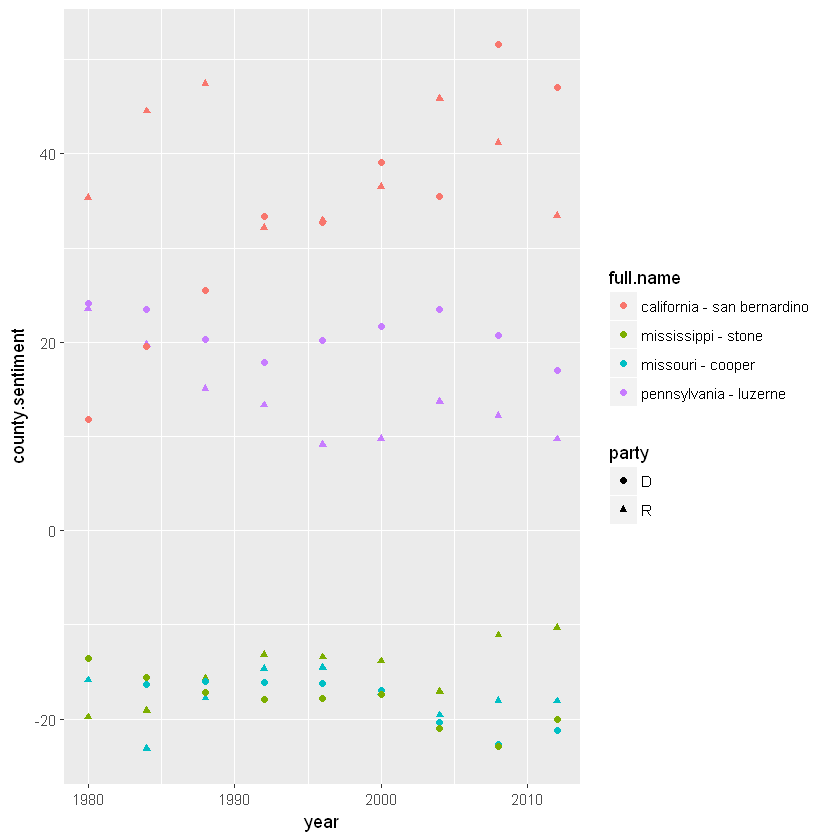

In [239]:
sample_counties <- sample(R_df$full.name, 4)

R_sample_df <- R_df %>% filter(full.name %in% sample_counties) %>% select(year, county.sentiment, full.name)
R_sample_df$party <- "R"

D_sample_df <- D_df %>% filter(full.name %in% sample_counties) %>% select(year, county.sentiment, full.name)
D_sample_df$party <- "D"

plot_df <- bind_rows(R_sample_df, D_sample_df)
ggplot(data = plot_df, aes(x = year, y = county.sentiment, colour = full.name, shape = party)) + geom_point()

In [243]:
year_to_select <- 1980

data_to_plot_df <- R_df %>%
    filter(year == year_to_select) %>%
    select(state.name, county.name, county.sentiment)

data_to_plot_df$breaks <- cut(data_to_plot_df$county.sentiment, 
                              breaks = c(-Inf, -50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50, +Inf))
                       #breaks = c(0, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.75, 1, 2, 3, 4, 5, 1000),
                       #labels = c("< 0.10", "0.10 - 0.15", "0.15 - 0.20", "0.20 - 0.30",
                                   #"0.30 - 0.40","0.40 - 0.50", "0.50 - 0.75", "0.75 - 1",
                                   #"1 - 2", "2 - 3", "3 - 4", "4 - 5", "> 5"))

states <- map_data("state")
counties <- map_data("county")

spatial_data_df = inner_join(counties, data_to_plot_df, 
                        by = c("subregion" = "county.name", "region" = "state.name"))

In [244]:
head(spatial_data_df)

long,lat,group,order,region,subregion,county.sentiment,breaks
-86.50517,32.34920,1,1,alabama,autauga,-13.44938,"(-20,-10]"
-86.53382,32.35493,1,2,alabama,autauga,-13.44938,"(-20,-10]"
-86.54527,32.36639,1,3,alabama,autauga,-13.44938,"(-20,-10]"
-86.55673,32.37785,1,4,alabama,autauga,-13.44938,"(-20,-10]"
-86.57966,32.38357,1,5,alabama,autauga,-13.44938,"(-20,-10]"
-86.59111,32.37785,1,6,alabama,autauga,-13.44938,"(-20,-10]"


In [255]:
spatial_data_df[order(-spatial_data_df$county.sentiment), ]

,long,lat,group,order,region,subregion,county.sentiment,breaks
21366,-88.20686,42.15824,576,22186,illinois,cook,1081.499,"(50, Inf]"
21367,-87.77141,42.15824,576,22187,illinois,cook,1081.499,"(50, Inf]"
21368,-87.74275,42.12386,576,22188,illinois,cook,1081.499,"(50, Inf]"
21369,-87.67400,42.06656,576,22189,illinois,cook,1081.499,"(50, Inf]"
21370,-87.66254,42.04364,576,22190,illinois,cook,1081.499,"(50, Inf]"
21371,-87.63963,41.99781,576,22191,illinois,cook,1081.499,"(50, Inf]"
21372,-87.62817,41.94051,576,22192,illinois,cook,1081.499,"(50, Inf]"
21373,-87.60525,41.85456,576,22193,illinois,cook,1081.499,"(50, Inf]"
21374,-87.58233,41.78008,576,22194,illinois,cook,1081.499,"(50, Inf]"
21375,-87.55368,41.75143,576,22195,illinois,cook,1081.499,"(50, Inf]"


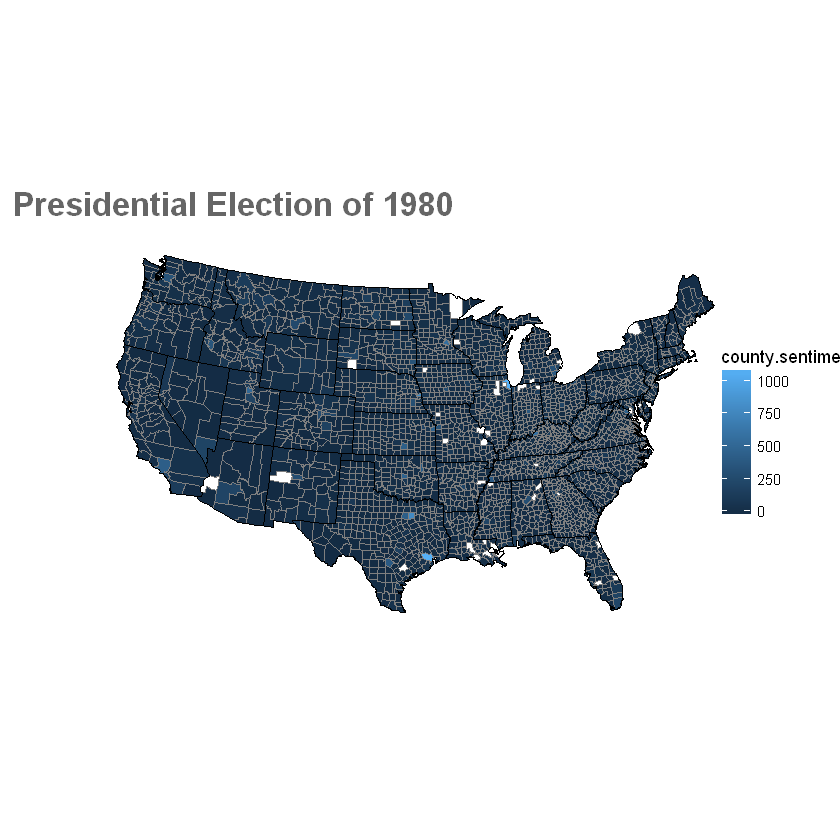

In [249]:
ggplot() +
    coord_map("albers", lat0 = 37.5, lat1 = 29.5) + 
    geom_polygon(data = spatial_data_df, 
                 aes(x = long, y = lat, group = group, fill = county.sentiment),
                 color = "gray50", size = 0.05) +
    #scale_fill_gradient(name = "Sentiment", "white", "red") +
    #scale_fill_manual(name = "Sentiment", values = colorRampPalette(c("white", "red"))(11)) +
    geom_polygon(data = states, 
                 aes(x = long, y = lat, group = group), 
                 fill = NA, color = "black") +
    theme(plot.title = element_text(color="#666666", face="bold", size=20), 
          axis.text = element_blank(), 
          axis.line = element_blank(), 
          axis.ticks = element_blank(),
          axis.title = element_blank(),
          legend.position = c(0.95, 0.5),
          panel.border = element_blank(), 
          panel.grid = element_blank(),
          panel.background = element_blank()) +
    ggtitle(paste("Presidential Election of", year_to_select))